In [1]:
import pandas as pd
import numpy as np
from arima import ARIMAModel, ARIMATools
import matplotlib.pyplot as plt


In [2]:
# df = pd.read_csv("bitcoin_price_series.csv")
# # Crie uma função para converter as datas
# # def convert_data(data_str):
# #     # Mapeie os nomes dos meses para seus números equivalentes
# #     meses = {'jan': 1, 'fev': 2, 'mar': 3, 'abr': 4, 'mai': 5, 'jun': 6, 'jul': 7, 'ago': 8, 'set': 9, 'out': 10, 'nov': 11, 'dez': 12}

# #     # Divida a string da data em partes
# #     partes = data_str.split('/')

# #     # Converta o mês para um número
# #     mes_num = meses[partes[0].lower()]

# #     # Adicione o ano e o mês ao novo formato de data
# #     nova_data = pd.to_datetime(f'20{partes[1]}-{mes_num:02d}')

# #     return nova_data

# # # Aplique a função de conversão à coluna 'data'
# # df['data'] = df['data'].apply(convert_data)

# # # Agora, 'data' está no formato de data e pode ser usada como índice para uma série temporal
# # # # df.set_index('data', inplace=True)


# # df = df.drop(columns=["Unnamed: 0"])

# # df.set_index('Date', inplace=True)
# # df.columns = ['target']

# # # Substitua a vírgula por ponto e converta para float
# # df['target'] = df['target'].str.replace(',', '.').astype(float)

# df = df[['Price', 'Close']]
# df.drop([0, 1], inplace=True)


In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def baixar_dados_sp500(inicio='2023-01-01', fim='2024-01-01'):
    """
    Baixa dados históricos do Índice S&P 500
    
    Parâmetros:
    - inicio: Data de início da série
    - fim: Data de fim da série
    
    Retorna:
    - DataFrame com dados do S&P 500
    """
    sp500 = yf.download('^GSPC', start=inicio, end=fim)
    return sp500

def preparar_dados(df):
    """
    Prepara os dados para análise:
    - Calcula retornos diários
    - Remove valores nulos
    - Adiciona estatísticas básicas
    
    Parâmetros:
    - df: DataFrame original
    
    Retorna:
    - DataFrame preparado
    """
    # Remover linhas com valores nulos
    df_limpo = df.dropna()
    
    # Calcular retornos diários
    df_limpo['Retorno_Diario'] = df_limpo['Close'].pct_change() * 100
    
    # Calcular retornos acumulados
    df_limpo['Retorno_Acumulado'] = (1 + df_limpo['Retorno_Diario'] / 100).cumprod() - 1
    
    return df_limpo

def analisar_estatisticas(df):
    """
    Gera análise estatística dos retornos
    
    Parâmetros:
    - df: DataFrame preparado
    
    Retorna:
    - Dicionário com estatísticas
    """
    retornos = df['Retorno_Diario'].dropna()
    
    estatisticas = {
        'Media_Retornos': retornos.mean(),
        'Desvio_Padrao': retornos.std(),
        'Assimetria': stats.skew(retornos),
        'Curtose': stats.kurtosis(retornos),
        'Minimo': retornos.min(),
        'Maximo': retornos.max(),
        'Valor_em_Risco_95': np.percentile(retornos, 5),
        'Valor_em_Risco_99': np.percentile(retornos, 1)
    }
    
    return estatisticas

def visualizar_dados(df):
    """
    Cria visualizações dos dados do S&P 500
    
    Parâmetros:
    - df: DataFrame preparado
    """
    # Removendo a linha problemática de estilo
    plt.figure(figsize=(15, 15))
    
    # Figura com 3 subplots
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 15))
    
    # Preço de fechamento
    ax1.plot(df['Close'], color='blue')
    ax1.set_title('Preço de Fechamento do S&P 500')
    ax1.set_xlabel('Data')
    ax1.set_ylabel('Preço')
    
    # Retornos diários
    ax2.plot(df.index, df['Retorno_Diario'], color='green')
    ax2.set_title('Retornos Diários')
    ax2.set_xlabel('Data')
    ax2.set_ylabel('Retorno (%)')
    
    # Distribuição de retornos
    ax3.hist(df['Retorno_Diario'].dropna(), bins=50, color='red', alpha=0.7)
    ax3.set_title('Distribuição de Retornos')
    ax3.set_xlabel('Retorno (%)')
    ax3.set_ylabel('Frequência')
    
    plt.tight_layout()
    plt.show()


In [4]:

# Baixar dados
dados_sp500 = baixar_dados_sp500()

# Preparar dados
dados_preparados = preparar_dados(dados_sp500)


# Salvar dados preparados
dados_preparados.to_csv('sp500_preparado.csv')
print("\nDados preparados salvos em 'sp500_preparado.csv'")



[*********************100%***********************]  1 of 1 completed


Dados preparados salvos em 'sp500_preparado.csv'


In [5]:
df = pd.read_csv("sp500_preparado.csv")

In [6]:
df

,Price,Adj Close,Close,High,Low,Open,Volume,Retorno_Diario,Retorno_Acumulado
0,Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,NaN,NaN
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-01-03,3824.139892578125,3824.139892578125,3878.4599609375,3794.330078125,3853.2900390625,3959140000,NaN,NaN
3,2023-01-04,3852.969970703125,3852.969970703125,3873.159912109375,3815.77001953125,3840.360107421875,4414080000,0.753897,0.007539
4,2023-01-05,3808.10009765625,3808.10009765625,3839.739990234375,3802.419921875,3839.739990234375,3893450000,-1.164553,-0.004194
...,...,...,...,...,...,...,...,...,...
247,2023-12-22,4754.6298828125,4754.6298828125,4772.93994140625,4736.77001953125,4753.919921875,3046770000,0.166006,0.243320
248,2023-12-26,4774.75,4774.75,4784.72021484375,4758.4501953125,4758.85986328125,2513910000,0.423169,0.248581
249,2023-12-27,4781.580078125,4781.580078125,4785.39013671875,4768.89990234375,4773.4501953125,2748450000,0.143046,0.250367
250,2023-12-28,4783.35009765625,4783.35009765625,4793.2998046875,4780.97998046875,4786.43994140625,2698860000,0.037017,0.250830


In [7]:
df = df[['Price', 'Close']]
df = df.drop([0,1])
df = df.reset_index(drop=True)
df = df.rename(columns={'Price': 'date'})
df['date'] = pd.to_datetime(df['date'])  # Converte a coluna 'date' para datetime
df['Close'] = pd.to_numeric(df['Close'])  # Remove vírgulas e converte para float
df.set_index('date', inplace=True)
df.columns = ['target']
df

,target
date,
2023-01-03,3824.139893
2023-01-04,3852.969971
2023-01-05,3808.100098
2023-01-06,3895.080078
2023-01-09,3892.090088
...,...
2023-12-22,4754.629883
2023-12-26,4774.750000
2023-12-27,4781.580078


In [8]:
series = df['target']

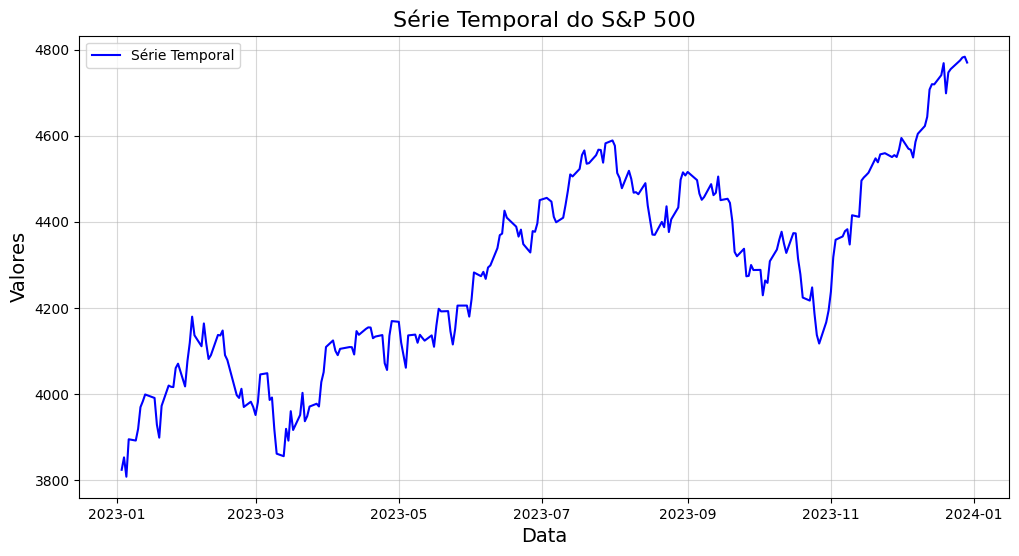

In [9]:
# Plota a série temporal
ARIMATools.plot_series(series, title='Série Temporal do S&P 500')


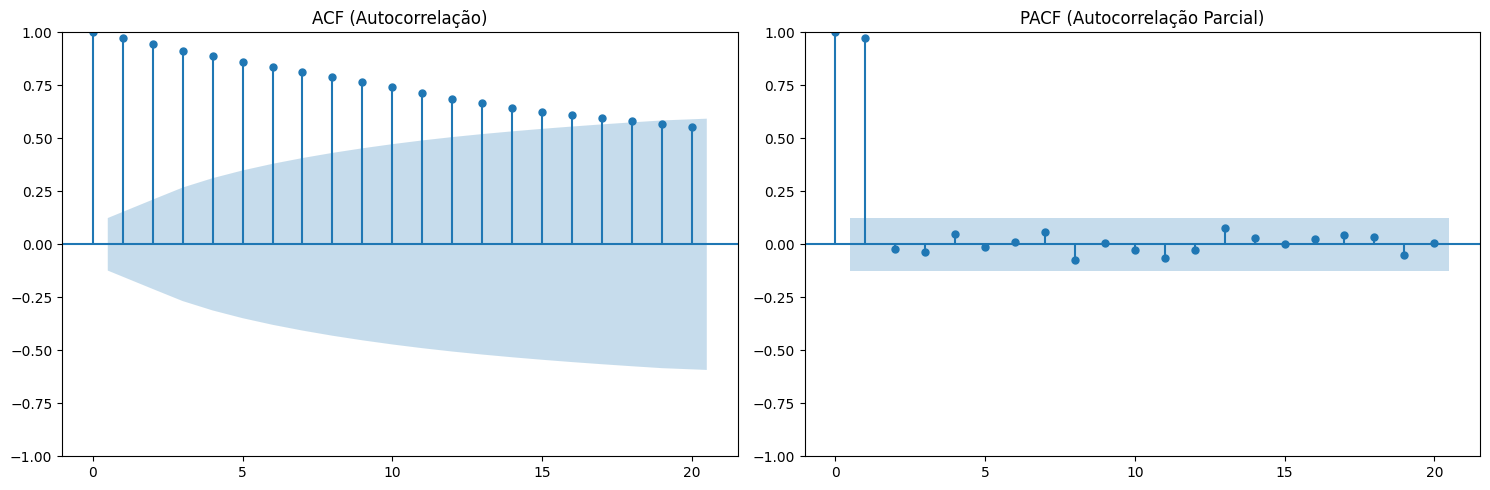

In [10]:
# Plota ACF e PACF
ARIMATools.plot_acf_pacf(series, lags=20)

In [11]:
# Instanciando o modelo
model = ARIMAModel()

In [12]:
ARIMATools.estimate_ar_ma(series, 0, 1)
ARIMATools.find_d(series, 3)

Grau de diferenciação ideal (d): 1


In [13]:
model.fit(series, p=0, d=1, q=1)

In [14]:
print("Parâmetros iniciais:")
print("AR (phi):", model.params_ar)
print("MA (theta):", model.params_ma)

Parâmetros iniciais:
AR (phi): []
MA (theta): [0.0526257102318809]


Previsões: [4770.111943256282, 4769.07626984531, 4770.51699739839, 4770.270654390323, 4769.906426992489, 4769.9590640940705, 4768.085597562363, 4765.778679298556, 4767.955351277657, 4767.996154240803, 4767.8116877885095, 4768.406625694182]


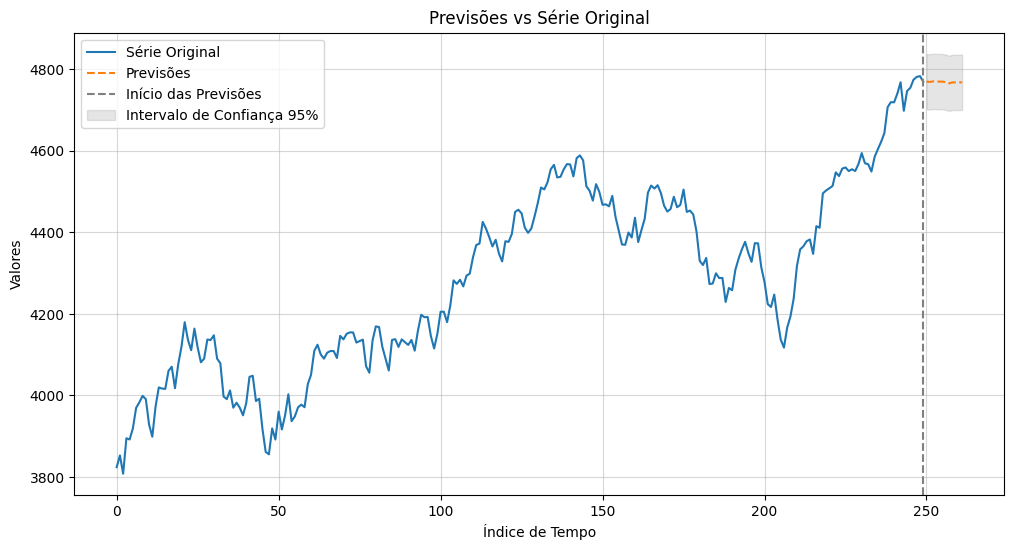

In [15]:

# Realiza previsões
forecast = model.predict(steps=12)
print("Previsões:", forecast)

# Plota a série temporal e as previsões
lower_bound, upper_bound = ARIMATools.calculate_confidence_intervals(forecast, model.residuals)
ARIMATools.plot_forecast(pd.Series(series), forecast, steps=12, lower_bound=lower_bound, upper_bound=upper_bound)


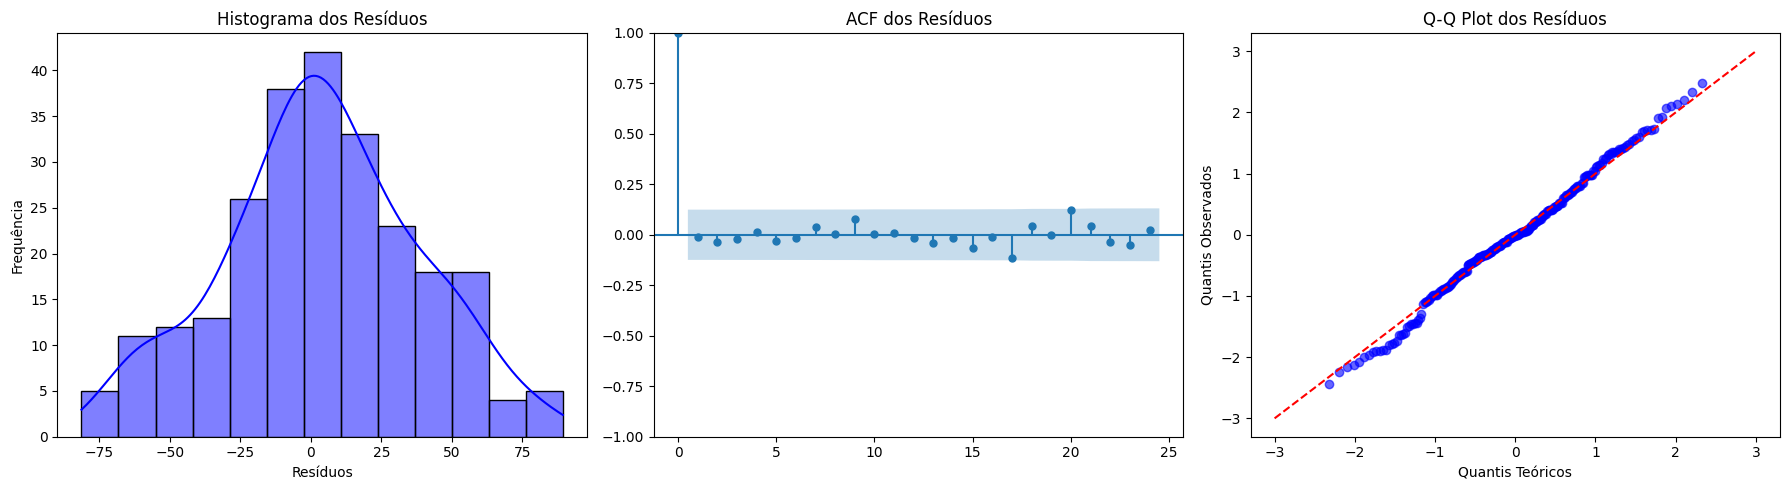

{'mean': 3.509444245921426,
 'std_dev': 34.670255297216336,
 'min': -81.3143717495393,
 'max': 89.34128940585613,
 'skewness': -0.03648070647943545,
 'kurtosis': -0.25944039595079404}

In [16]:
ARIMATools.analyze_residuals(model.residuals)